# [A Survey of Motion Planning and Control Techniques for Self-driving Urban Vehicles](https://mp.weixin.qq.com/s?__biz=MzU3OTA5MTE3OA==&mid=2247524812&idx=1&sn=8bf65312218ac65206df709e5719e731&chksm=fd694e49ca1ec75fe2c2a57d4ec00f406b78f95d628f1935f2a60f6cf27f0448064ade1dab00&mpshare=1&srcid=02098qIAkFxsyiY7UoTviPbg&sharer_sharetime=1675937122610&sharer_shareid=0acd6d6394df06956e3de0bc30f662fa&from=singlemessage&scene=1&subscene=10000&clicktime=1678329133&enterid=1678329133&sessionid=0&ascene=1&fasttmpl_type=0&fasttmpl_fullversion=6582716-zh_CN-zip&fasttmpl_flag=0&realreporttime=1678329133166&devicetype=android-31&version=4.0.19.6020&nettype=ctnet&abtest_cookie=AAACAA%3D%3D&lang=zh_CN&countrycode=CN&exportkey=n_ChQIAhIQ42gYw5CVqhFnhA5OxZNe3xLbAQIE97dBBAEAAAAAAERDMaRQw8sAAAAOpnltbLcz9gKNyK89dVj0odWnnF9O8SiniKfpe1JxARPHNg799lwDgZ4C1rALv4DeyjfdP%2FYkh9wF6CHMKabgJovHWmhRQN0sGsMI%2F8CmRFEzPlwrZL4d8znP9fZXdqCHQrxT6tkJQA3n%2FsjcfQMlpnHWA50xt7avRMifiy%2FQsEF23LNeoau6DrGgpX2%2BYWx6TITBmKHe8RB222B7b4yIpyWFEOmtDYmfNASKtIaQpGNJFvjsQfyUb4QjZoIr%2FVxd%2BqrMTw%3D%3D&pass_ticket=Jc%2BY%2BohFKOUj3IHPEjQOuPWBgxMhvMKtc9mnMMOrUGmXlPXwqLinDSWqJpHZ71e%2FHU5YDaN2FtEw2Xt3zhCz2Q%3D%3D&wx_header=3&platform=win)
## 摘要
&emsp;&emsp;自动驾驶汽车是一项成熟的技术，有潜力通过提高汽车运输的安全性、可达性、效率和便捷性来重塑其机动性。自动驾驶汽车必须执行安全关键任务，包括在与其他车辆和行人共享的动态环境中规划运动，以及通过反馈控制的鲁棒执行。本文的目的是综述规划和控制算法的最新技术水平，特别是针对城市环境。回顾一些公开的技术，并讨论了其有效性。所调查的方法在使用的车辆移动模型、环境结构假设和计算要求方面有所不同。本文呈现的对比有助于深入了解所审查方法的优势和局限性，并有助于系统级的设计选择。  
## 引言
&emsp;&emsp;过去三十年，学术界和工业界对开发无人驾驶汽车技术的研究力度稳步增加。这些发展得益于传感和计算技术的最新进展，对汽车运输和已被见证的社会效益产生潜在变革性影响：2014年，32675人因交通事故死亡，230万人受伤，610万人遭遇碰撞事故[1]。估计94%的事故是因为驾驶员的失误，其中31%涉及法律上判定的醉酒驾驶员，10%源自分心的驾驶员[2]。自动驾驶汽车有潜力大大减少驾驶员失误和疏忽造成的车辆碰撞。它还将为因身体或视觉残疾而无法驾驶的人提供个人移动的方式。最后，86%的美国劳动力每天在汽车通勤上平均花费25分钟[3]，自动驾驶汽车将有助于更有效地利用交通时间，或者至少减少驾驶压力所带来的可测量的副作用[4]。  

&emsp;&emsp;考虑到这项新技术的潜在影响，自动驾驶汽车拥有悠久的历史不足奇怪。这个想法早在 1920 年代就已经存在，但直到 1980 年代无人驾驶汽车才真正成为可能。Ernst Dickmanns[5]在1980年代领导的开创性工作为自动驾驶汽车的发展铺平了道路。当时，一项大规模的研究工作，即普罗米修斯项目，被资助用于开发一种自动驾驶汽车。1994年，这项工作发布了一个引人注目的演示，VaMP无人驾驶汽车行驶了1600公里，其中95%的路程是自动驾驶[6]。与此同时，卡内基梅隆大学NAVLAB在该领域取得了进展，并于1995年展示了最新进展，在美国行驶5,000公里，其中98%的路程是自动驾驶[7]。  

&emsp;&emsp;无人驾驶汽车技术的下一个重大里程碑是2004年的第一届DARPA挑战赛。目标是让无人驾驶汽车尽可能快地完成150英里的越野路线。与之前的演示相比，这是一个重大挑战，因为在比赛期间没有人为干预。尽管先前的研究工作展示了近乎完全的自动驾驶，但在关键时刻取消人为干预被证明是一项重大挑战。参加赛事的15辆车都没完成比赛。2005年类似的赛事被举办，这次23支队伍中有5支到达终点[8]。后来，DARPA城市挑战赛在2007年被举办，要求车辆在模拟城市环境中自动驾驶。六支队伍完成了这项赛事，证明完全自主的城市驾驶是可能的[9]。  

&emsp;&emsp;自DARPA挑战以来，已经开展了许多赛事和大型自动驾驶车辆系统测试。值得注意的例子包括2009年至2013年的智能汽车未来挑战赛（Intelligent Vehicle Future Challenges）[10]、2010年的现代自动驾驶挑战赛（Hyundai Autonomous Challenge）[11]、2010年的VisLab洲际自动驾驶挑战赛（VisLab Intercontinental Autonomous Challenge）[12]、2013年的公共道路城市无人驾驶汽车测试（Public Road Urban Driverless-Car Test）[13]，以及Bertha-Benz历史路线（Bertha-Benz historic route）的自动驾驶[14]。同时，学术界和工业界的研究都在加速进行。谷歌的自动驾驶汽车[15]和特斯拉的自动驾驶系统（Autopilot system）[16]是两个商业成果的例子，受到媒体的广泛关注。  

&emsp;&emsp;汽车的自动化范围从完全人工操作到完全自主。SAE J3016标准[17]引入了从0到5的等级，用于评定汽车自动化等级。在该标准中，0级表示所有驾驶任务均由人类驾驶员负责的车辆。1级包括基本驾驶辅助，如自适应巡航控制（adaptive cruise control）、防抱死制动系统（anti-lock braking systems）和电子稳定控制（electronic stability control）[18]。第2级包括**高级辅助，如最小危险纵向/横向控制[19]或紧急制动[20, 21]，它们建立在基于集合的形式控制理论方法的基础上，用以计算可证明的无碰撞（安全）状态的“最坏情况”集合**[22-24]。在第3级，系统监控环境，并在特定条件下能够完全自主驾驶，但如果驾驶任务超出自主系统的操作范围，仍需人类操作员进行控制。4级自动化汽车能够在一定条件下完全自动驾驶，并且如果操作员未能根据干预请求进行控制，系统仍可以安全地控制汽车。5级系统在所有驾驶模式下都是完全自主的。  

&emsp;&emsp;车载计算和无线通信技术的可用性使汽车能够与其他汽车和道路基础设施交换信息，从而产生了一个与联网智能汽车密切相关的研究领域[25]。该研究旨在通过各车辆之间的信息共享和协调，提高道路运输的安全性和性能。例如，联网车辆技术有可能提高交叉路口的吞吐量[26]或防止交通流冲击波的形成[27]。  

&emsp;&emsp;为了限制本综述的范围，我们聚焦自动驾驶汽车的决策、运动规划和控制方面，特别是自动化级别为3级及以上的系统。出于同样的原因，自动驾驶的感知领域被忽略，读者可以参考该主题的一些综合调研和最近的主要贡献[28-31]。  

&emsp;&emsp;现代自动驾驶系统的决策层次结构通常分为**导航规划、行为决策、局部运动规划和反馈控制**。然而，由于文献出现该方案的不同变体，因此这些层次的划分相当模糊。本文为解决自动驾驶的核心问题，提供了一个上述方法的文献综述。重点介绍局部运动规划和控制的方法。  

&emsp;&emsp;本文的其余部分结构如下：在[第2节](#无人驾驶汽车使用的决策层综述)中，对决策过程的层次结构及其设计方法进行了高层次的概述。[第3节](#规划与控制建模)回顾了用于近似城市环境中汽车运动的模型，用于运动规划和反馈控制。[第4节](#运动规划)综述了运动规划的大量文献，并讨论了其对自动驾驶汽车的可用性。[第5节](#车辆控制)讨论了无人驾驶汽车的path和轨迹稳定性问题，以及具体反馈控制方法。最后，[第6节](#结论)总结了目前的最新技术，以及未来研究的潜在领域。  
## 无人驾驶汽车使用的决策层综述
&emsp;&emsp;在本节中，我们描述典型自动驾驶汽车的决策层架构，并讨论每个组成部分的职责。无人驾驶汽车本质上是一种自主决策系统，它处理(雷达、激光雷达LIDARs、相机、全球定位系统GPS/惯性导航系统INS单元、里程计等）车载传感器的观测流。这些观测结果，与路网、道路规则、车辆动力学和传感器模型的先验知识一起，被用于自动选择控制变量的值，这些变量控制车辆的运动。智能汽车研究旨在尽可能地实现驾驶任务的自动化。对于这个问题通常采用的方法是，将感知和决策任务划分并组织成一个层次结构。感知系统使用先验信息和收集的观测数据，用以提供车辆及其周围环境的状态估计；然后，决策系统使用这些估计值控制车辆，从而实现驾驶目标。  

&emsp;&emsp;典型自动驾驶汽车的决策系统按层级分解为四个部分（如图II.1）：在最高层，通过路网规划一个导航路线；接下来的行为层决定局部驾驶任务，使汽车朝目的地前进，同时遵守道路规则；随后，运动规划模块选择一条穿过环境的连续path，以完成局部导航任务；最后，控制系统实时修正规划运动的执行误差。本节的剩余部分将更详细地讨论每个组成部分的职责。  
### Route Planning
&emsp;&emsp;在最高层，车辆的决策系统必须从路网选择一条从当前位置到请求目的地的路线。将路网表示为一个正权有向图，权重对应穿过路段的成本，可将导航建模为在路网图中找一条成本最小的路径问题。然而，表示路网的图可能包含数百万条边，使得经典最短路径算法（如Dijkstra[32]或A*[33]）不再实用。交通网络中的高效导航问题引起了交通科学界的极大兴趣，催生了一系列算法，这些算法经过一次性的预处理步骤后，能够在毫秒时间内返回大陆规模路网中的一条最优路线[34, 35]。在适用于人类驾驶和自动驾驶车辆的高效导航领域，实用算法的全面综述和对比请参考[36]。
### Behavioral Decision Making
&emsp;&emsp;在规划好路线后，自动驾驶车辆必须根据驾驶惯例和道路规则，在选定的路线上行驶并与其他交通参与者进行交互。给定一系列所选路线的路段，行为层基于其他交通参与者的感知行为、路况和基础设施的信号，负责在任何时刻选择适当的驾驶行为。例如，当车辆到达路口前的停止线，行为层将命令车辆停下来，观察路口的其他车辆、自行车和行人的行为，一旦轮到自车通行时让自车继续前进。  

&emsp;&emsp;驾驶手册规定了具体驾驶环境的定性行动。由于驾驶环境和每个环境中可用的行为都可以被建模为有限集，因此自动决策的一种自然方法是**将每个行为建模为有限状态机中的状态**，状态转移受感知的驾驶环境控制，例如与规划的导航路线和附近车辆的相对位置。事实上，在DARPA城市挑战赛中，大多数团队在所考虑的驾驶场景中，耦合有限状态机和不同启发式，作为行为控制的机制[9]。  

&emsp;&emsp;然而，现实世界（尤其是城市环境）中驾驶的特点是，其他交通参与者的**意图/intentions**不确定性。因此，对其他车辆、自行车和行人未来轨迹的意图预测与估计问题也已经被研究。提出的解决方案包括基于不同技术的机器学习，例如**高斯混合模型**[37]、**高斯过程回归**[38]、被报道的在谷歌自动驾驶系统中用于**意图预测**的学习技术[39]，以及直接从传感器观测中估计意图的建模方法[40, 41]。  

&emsp;&emsp;其他交通参与者的行为不确定性通常在行为层中考虑，使用概率规划形式进行决策，例如马尔可夫决策过程 (MDP) 及其推广。例如，[42]使用MDP框架建模了行为决策问题。一些工作[43–46]使用部分可观察马尔可夫决策过程（POMDP）框架，对未观察到的驾驶场景和行人意图进行精确建模，并提出具体的近似求解策略。  
### Motion Planning
&emsp;&emsp;**当行为层决定了在当前环境下将要执行的驾驶行为（例如车道巡航、变道或右转）后，所选行为必须转换为可由低级反馈控制器跟踪的path或轨迹**。生成的path或轨迹对于车辆必须是动态可行的，对于乘客是舒适的，并避免与车载传感器检测到的障碍物发生碰撞。找到这样的一条path或轨迹是运动规划系统的职责。  

&emsp;&emsp;自动驾驶车辆的运动规划任务对应于求解机器人文献中讨论的标准运动规划问题。运动规划问题的精确解在大多数情况下都是难以计算的。因此，实践中通常使用数值近似方法。最流行的数值方法包括：
- 变分法，其将问题建模为函数空间中的非线性优化；
- 图搜索方法，其构造车辆状态空间的图形离散化，并搜索一条最短路径；
- 基于增量树（incremental tree）的方法，从车辆的初始状态开始，增量地构造一个可达状态树，并选择这棵树的最佳分支。  

[第4节](#运动规划)将更详细地讨论与自动驾驶相关的运动规划方法。  
### Vehicle Control
&emsp;&emsp;为了执行运动规划系统给出的参考path或轨迹，反馈控制器用于选择适当的执行器输入，以执行规划的运动并纠正跟踪误差。执行规划运动期间产生的跟踪误差部分原因是车辆模型不准确。因此，非常重视闭环系统的鲁棒性和稳定性。  

&emsp;&emsp;当前，许多有效的反馈控制器已经被提出，用于执行运动规划系统提供的参考运动。[第5节](#车辆控制)详细讨论了相关技术的调查。

## 规划与控制建模
&emsp;&emsp;在本节中，我们将综述最常用的类车车辆（car-like vehicles）的移动模型。这些模型被广泛用于控制和运动规划算法，在相关操作条件下近似车辆的行为以控制动作。**高保真模型(high-fidelity model)可以准确地反映车辆的响应，但增加的细节可能会使规划和控制问题复杂化。这要求在所选模型的准确性和决策问题的难度之间做出权衡**。本节提供了通用建模概念的概述，及运动规划和控制所使用模型的综述。  

&emsp;&emsp;建模从车辆配置的概念开始，代表其在世界中的姿态或位置。例如，配置可以表示为汽车上一点的平面坐标以及汽车的航向。这是汽车配置空间的坐标系。该坐标系描述平面刚体运动（由二维的特殊欧氏群，SE(2)表示），是一种常用的构型空间[47-49]。随后，车辆运动必须被规划和监督以完成驾驶任务，同时满足所选模型引入的约束。  
### 运动学单轨模型
&emsp;&emsp;实践使用的最基础的模型中，汽车由两个由刚性连杆连接的轮子组成，并且被限制在平面内移动[48-52]。假设车轮在与地面的接触点处不打滑，但可以绕其旋转轴自由旋转。前轮具有额外的自由度，可以绕垂直于运动平面的轴旋转。这是模拟转向。这两个建模特征反映了大多数乘客的体验，即汽车无法在不向前移动的同时实现横向位移。更正式地，机动性的制被称为非完整约束[47, 53]。非完整约束表示汽车运动的微分约束。这种表达随坐标系的选择而变化。这种模型的变体被称为类车机器人、自行车模型、运动学模型或单轨模型。  

&emsp;&emsp;接下来是在几种流行的坐标系下对配置的微分约束的推导。参照[图III.1](#pic_3_1)，向量$p_r$和$p_f$分别表示(静止坐标系或惯性坐标系中)后轮和前轮的位置，坐标系的基向量为$(\hat{e}_x, \hat{e}_y, \hat{e}_z)$。航向$\theta$是描述车辆朝向的角度。它被定义为向量$\hat{e}_x$和$p_f-p_r$的夹角。  

&emsp;&emsp;微分约束可以从坐标系中推导出，该坐标系包含角度$\theta$，以及[54]中的$p_r$和[55]中的$p_f$两点之一的运动。  
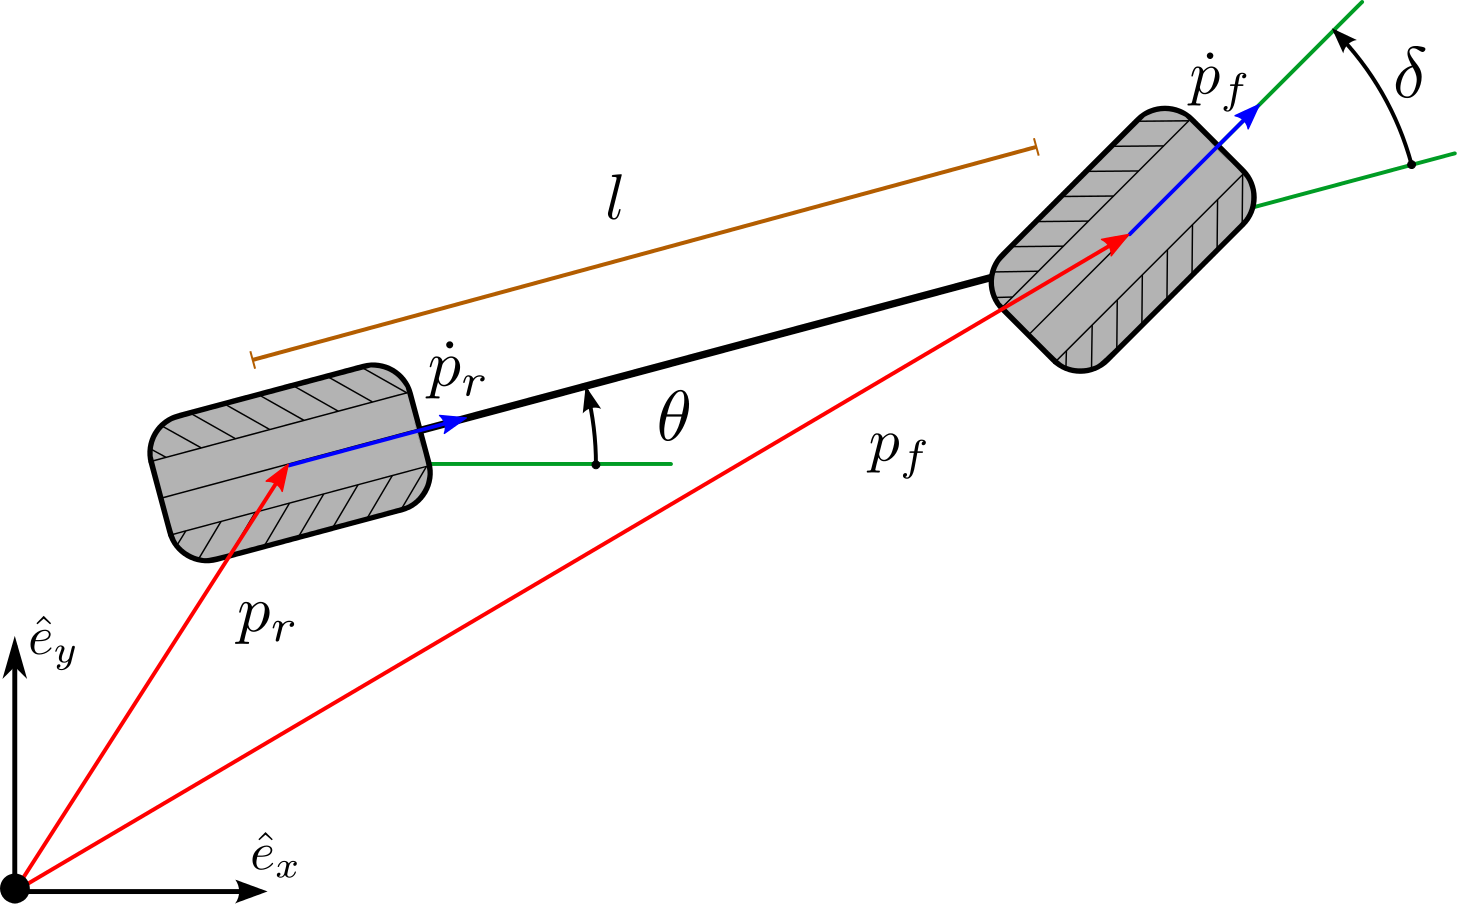
图 III.1<span id='pic_3_1'></span>：单轨模型的运动学。$p_r$和$p_f$分别是后轮和前轮的接地点。$\theta$是车辆航向。$p_r$和$p_f$关于时间的导数被非完整约束限制在蓝色箭头所指的方向。$\delta$为前轮转向角(steering angle)。

&emsp;&emsp;点$p_r$和$p_f$的运动必须与车轮方向共线，以满足无滑移假设。用方程表示，后轮的约束是
$$ (\dot{p}_r \cdot \hat{e}_y) \cos\theta - (\dot{p}_r \cdot \hat{e}_x) \sin\theta = 0 \cdots\cdots III.1$$
>$ \Leftarrow \cos(90^{\circ} - \theta) \cos\theta - \cos\theta \sin\theta = 0$

前轮约束是
$$ (\dot{p}_f \cdot \hat{e}_y) \cos(\theta+\delta) - (\dot{p}_f \cdot \hat{e}_x) \sin(\theta+\delta) = 0 \cdots\cdots III.2$$
>$ \begin{aligned} \Leftarrow & (\dot{p}_f \cdot \hat{e}_y) \cos(\theta+\delta) - (\dot{p}_f \cdot \hat{e}_x) \sin(\theta+\delta) \\
= & \cos(90^{\circ}-\theta-\delta) \cos(\theta+\delta) - \cos(\theta+\delta)\sin(\theta+\delta) \\
= & \sin(\theta+\delta) \cos(\theta+\delta) - \sin(\theta+\delta)\cos(\theta+\delta) = 0\end{aligned}$

&emsp;&emsp;该表达式通常以每个点沿基向量的分量运动的形式重写。 后轮沿$\hat{e}_x$方向的运动定义为$x_r := p_r \cdot \hat{e}_x$。类似地，对于$\hat{e}_y$方向，$y_r := p_r \cdot \hat{e}_y$。前进速度为$v_r := \dot{p}_r \cdot (p_f − p_r )/\Vert p_f − p_r \Vert$，它是$\dot{p}_r$的数值大小加上正确的符号，以表示正向或反向行驶。就标量$x_r, y_r, \theta$而言，微分约束如下：
$$\begin{aligned} \dot{x}_r & = v_r \cos\theta, \\
\dot{y}_r & = v_r \sin\theta, \\
\dot{\theta} & = \frac{v_r}{l}\tan\delta. \cdots\cdots III.3 \end{aligned}$$
类似地，微分约束可以写成$p_f$的运动形式，
$$\begin{aligned} \dot{x}_f & = v_f \cos(\theta+\delta), \\
\dot{y}_f & = v_f \sin(\theta+\delta), \\
\dot{\theta} & = \frac{v_f}{l}\sin\delta. \cdots\cdots III.4 \end{aligned}$$
这里使用前轮的前进速度$v_f$。前轮速度$v_f$与后轮速度的关系为
$$\frac{v_r}{v_f} = \cos\delta \cdots \cdots III.5$$

&emsp;&emsp;该模型的规划和控制问题涉及在车辆的机械极限内选择转向角$\delta \in [\delta_{min}, \delta_{max}]$，以及在可接受的范围内选择前进速度$v_r \in [v_{min}, v_{max}]$。  

&emsp;&emsp;一种[56]使用的简化，是选择航向变化率(heading rate)$\omega$，而不是转向角$\delta$。这些量的关系是
$$\delta = \arctan\left( \frac{l\omega}{v_r} \right) \cdots \cdots III.6$$
将航向动力学简化为
$$\dot{\theta} = \omega, \omega \in \left[ \frac{v_r}{l}\tan(\delta_{min}), \frac{v_r}{l}\tan(\delta_{max}) \right] \cdots \cdots III.7$$
在这种情况下，该模型有时被称为单轮车模型，因为它可以通过考虑单个车轮的运动进行推导。  

&emsp;&emsp;该模型的一个重要变体是$v_r$是定值的情况。该模型有时被称为Dubins Car，它推导出具有指定切线的两点之间的最小时间运动[57]。另一个值得注意的变体是Reeds-Shepp car，当$v_ r$采用固定的前进和后退速度时，该车的最小长度路径是已知的[58]。这两种模型已被证明对运动规划具有一定的重要性，并将在[第4节](#运动规划)中进一步讨论。  

&emsp;&emsp;**运动学模型(kinematic models)适用于规划低速场景的paths**（例如，泊车和城市驾驶），相比于无滑移假设对移动性的限制，惯性效应较小。该模型的**主要缺点是它允许瞬时的转向角变化**，如果运动规划模块生成具有这种瞬时变化的解，可能会出现问题。  

&emsp;&emsp;转向角的连续性可以通过增强(III.4)实现，其中转向角与[49]中的指令速率相结合。公式(III.4)变为
$$\begin{aligned} \dot{x}_f & = v_f \cos(\theta+\delta), \\
\dot{y}_f & = v_f \sin(\theta+\delta), \\
\dot{\theta} & = \frac{v_f}{l}\sin\delta, \\
\dot{\delta} & = v_{\delta}. \cdots\cdots III.8 \end{aligned}$$
除了转向角的限制外，现在还可以限制转向速率：$v_{\delta} \in \left[ \delta_{min}, \delta_{max} \right]$。同样问题也可能发生在车速$v_r$上，并且可以用同样的方法解决。这种技术的缺点是增加模型的维度，使运动规划与控制问题更复杂。  

&emsp;&emsp;坐标系的选择不限于使用哪个车轮位置作为位置坐标。**对于使用经典力学原理推导出的模型，使用质心[59, 60]或者振荡中心[61, 62]作为位置坐标会更加方便**。  
### 惯性效应(动力学模型)
&emsp;&emsp;**当车辆的加速度足够大时，轮胎与地面之间的无滑移假设就失效了。在这种情况下，更准确的车辆模型是满足基本动量原理的刚体。也就是说，加速度与地面对轮胎施加的力成正比**。取$p_c$作为车辆的质心，配置坐标（参见[图III.2](#pic_3_2)），车辆的运动受制于
$$\begin{aligned} m\ddot{p}_c & = F_f + F_r, \\
I_{zz}\ddot{\theta} & = (p_c - p_f) \times F_f + (p_c - p_r) \times F_r \cdots\cdots III.9 \end{aligned}$$
其中，$ F_r$和$F_f$是通过地面与轮胎接触，地面施加给车辆的力，$m$是车辆的总质量，$I_{zz}$是在$\hat{e}_z$方向上质心的极惯性矩。在接下来的推导中，假设道路是水平的，悬架是刚性的，并且车辆保持在道路上，我们默认忽略$p_c$在$\hat{e}_z$方向上的运动。
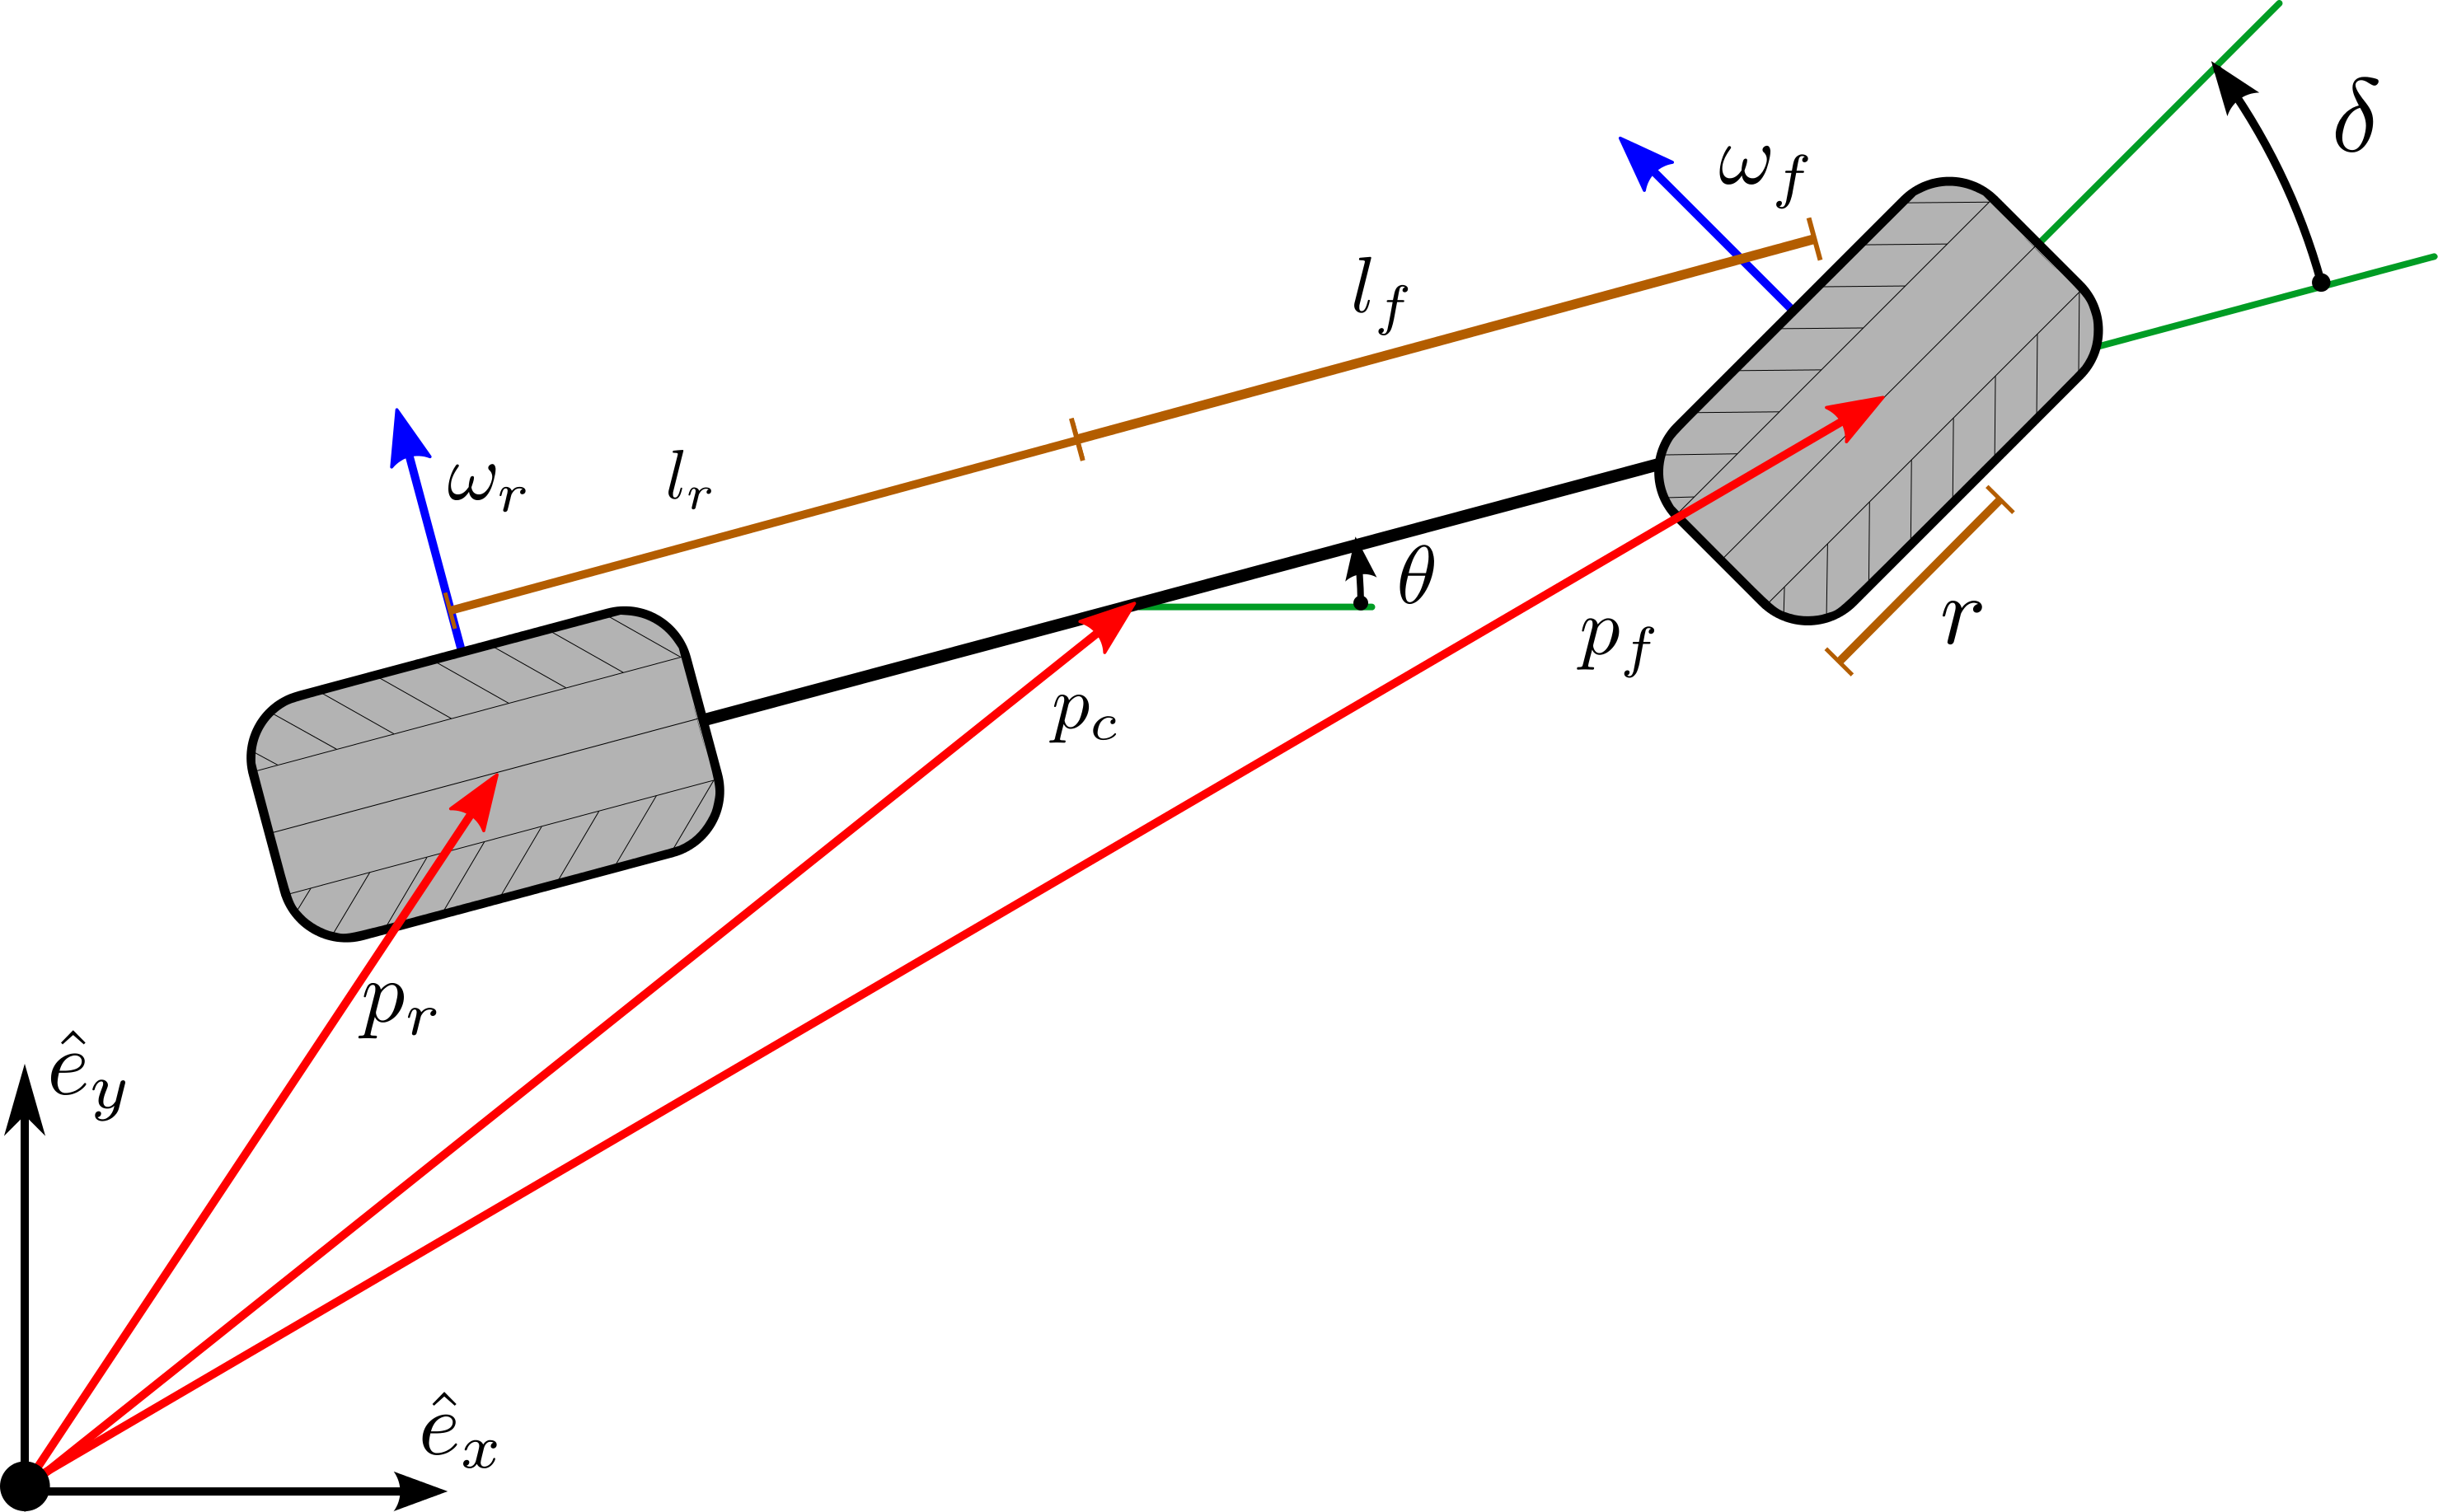
图 III.2<span id='pic_3_2'></span> 存在滑移假设的单轨模型运动学示意图。$\omega\{r, f\}$是轮胎相对于车辆的相对角速度。  

&emsp;&emsp;$F_r$和$F_f$的表达式因建模假设而异[18, 59, 60, 62]，但在任何情况下，表达式的推导都是乏味的。因此，方程(III.10)-(III.15)提供了详细的推导作为参考。  

&emsp;&emsp;地面与轮胎之间的力被建模为与轮胎在地面上滑动的速率有关。尽管质心用作配置的坐标，但仍然需要每个车轮相对于地面的速度，以确定相对速度。这三个点之间的运动学关系为
$$\begin{aligned} p_r & = p_c + 
\left( \begin{array}{c} -l_r\cos\theta \\ -l_r\sin\theta \\ 0 \end{array} \right), \\
\dot{p}_r & = \dot{p}_c + 
\left( \begin{array}{c} 0 \\ 0 \\ \dot{\theta} \end{array} \right) \times
\left( \begin{array}{c} -l_r\cos\theta \\ -l_r\sin\theta \\ 0 \end{array} \right), \\
p_f & = p_c + 
\left( \begin{array}{c} l_f\cos\theta \\ l_f\sin\theta \\ 0 \end{array} \right), \\
\dot{p}_f & = \dot{p}_c + 
\left( \begin{array}{c} 0 \\ 0 \\ \dot{\theta} \end{array} \right) \times
\left( \begin{array}{c} l_f\cos\theta \\ l_f\sin\theta \\ 0 \end{array} \right). 
\cdots\cdots III.10 \end{aligned}$$
这些运动学关系用于确定每个轮胎与地面接触点的速度$s_r$和$s_f$。这些点的速度被称为轮胎滑动速度。一般来说，$s_r \& s_f$与$\dot{p}_r \& \dot{p}_f$的区别在于轮胎的角速度。运动学关系如下：
$$\begin{aligned} s_r & = \dot{p}_r + \omega_r \times R, \\ 
s_f & = \dot{p}_f + \omega_f \times R
\cdots \cdots III.11 \end{aligned}$$
车轮的角速度如下：
$$ \omega_r = \left( \begin{array}{c} \Omega_r\sin\theta \\ -\Omega_r\cos\theta \\ 0 \end{array} \right),\ 
\omega_f = \left( \begin{array}{c} \Omega_f\sin(\theta+\delta) \\ -\Omega_f\cos(\theta+\delta) \\ 0 \end{array} \right),\ 
R = \left( \begin{array}{c} 0 \\ 0 \\ -r \end{array} \right)
\cdots \cdots III.12$$
车轮半径是标量$r$，$\Omega_r\&\Omega_f$是每个车轮相对汽车的角速度。后轮的示例如[图III.3](#pic_3_3)所示。
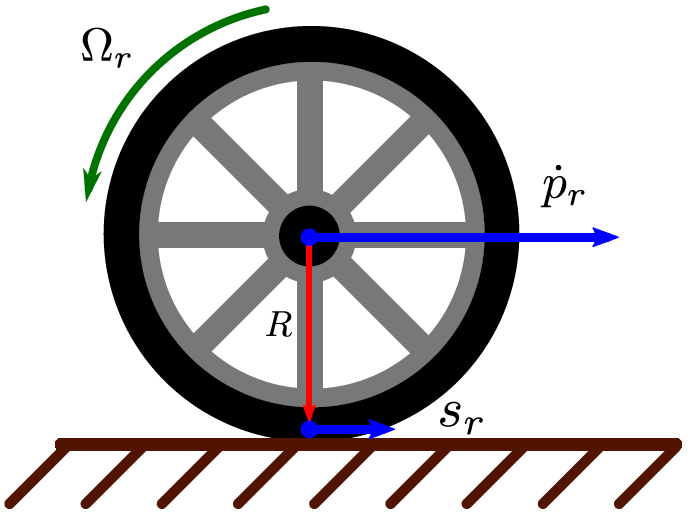
图 III.3<span id='pic_3_3'></span> 二维后轮运动学示意图，展示了车轮滑移$s_r$, 与后轮速度$\dot{p}_r$和角速度$r$的关系。一般来说,$s_r$和 $\dot{p}_r$不共线，并且可能在垂直于所绘平面的方向上具有非零分量。  

&emsp;&emsp;在静态条件下，或者当质心高度可以近似为$p_c \cdot \hat{e}_z \approx 0$时，垂直于地面的力的分量$F_{\{r,f\}} \cdot \hat{e}_z$, 可以通过静态力矩平衡计算:
$$F_f \cdot \hat{e}_z = \frac{l_rmg}{l_f+l_r}, \quad F_r \cdot \hat{e}_z = \frac{l_fmg}{l_f+l_r} \cdots  III.13 $$

&emsp;&emsp;然后使用法向力来计算每个轮胎上的牵引力, 以及轮胎特性的滑移和摩擦系数模型$\mu$。后轮上的牵引力以分量的形式给出:
$$\begin{aligned} F_r \cdot \hat{e}_x & = -\frac{(F_r \cdot \hat{e}_z)\mu\left( \frac{\left\| s_r \right\|}{\Omega_r \cdot r} \right) s_r}{\left\| s_r \right\|} \cdot \hat{e}_x, \\ 
F_r \cdot \hat{e}_y & = -\frac{(F_r \cdot \hat{e}_z)\mu\left( \frac{\left\| s_r \right\|}{\Omega_r \cdot r} \right) s_r}{\left\| s_r \right\|} \cdot \hat{e}_y
\cdots III.14 \end{aligned}$$

&emsp;&emsp;相似的表达，用下标$f$替换下标$r$，描述前轮。上式建模牵引力为与滑移反向平行, 量纲正比于法向力, 并与滑移率非线性相关(对于后轮/前轮, 滑移的量纲由$\Omega_r \cdot r$/$\Omega_f \cdot r$标准化)。联立公式(III.10)-(III.15)，可得到汽车每个车轮上的净力表达式，它关于控制变量、广义坐标及其速度。公式(III.14)与下列模型结合，

$$ \mu\left( \frac{\left\| s_r \right\|}{\Omega_r \cdot r} \right) = D \sin \left( C \arctan\left( B\frac{\left\| s_r \right\|}{\Omega_r \cdot r} \right) \right) \cdots III.15$$
是一种轮胎与地面相互作用的常用模型。公式(III.15)是Pacejka[63]提出的经典模型的简化版本。  

&emsp;&emsp;公式(III.14)的旋转对称性与公式(III.15)中的峰值一起, 导致轮胎可以在任何方向上施加的最大法向力。该峰值被称为摩擦圆，如图III.4所示。  

&emsp;&emsp;本节讨论的模型经常出现在无人驾驶汽车运动规划与控制的文献中。它们适用于本次调查中讨论的运动规划和控制任务。然而，较低级别的控制任务，例如电子稳定控制和主动悬架系统，通常使用更复杂的底盘、转向和传动系统模型。

## 运动规划
&emsp;&emsp;运动规划层负责计算一条安全、舒适、动态可行的轨迹，该轨迹从车辆的当前配置到决策层次结构的行为层提供的目标配置。根据上下文，目标配置可能会有所不同。目标位置可以是行进方向前方数米处的当前车道的中心点、下一个交叉路口处的停止线的中心或下一个期望的停车位。运动规划组件接收有关车辆周围静态和动态障碍物的信息，并生成无碰撞轨迹，该轨迹满足车辆运动的动力学和运动学约束。通常，运动规划器还会最小化给定的目标函数。除了行程时间，目标函数还会惩罚危险的或导致乘客不舒适的运动。在典型的设置中，运动规划器的输出随后被传递到本地反馈控制层。接下来，反馈控制器生成输入信号，以调节车辆遵循给定的运动规划。

&emsp;&emsp;车辆的运动规划可以采用路径或轨迹的形式。在路径(path)规划框架中，解路径可表示为函数$\sigma(\alpha): [0,1]\to\chi$，其中$\chi$是车辆的配置空间。**值得注意的是，这样的解并未规定应如何遵循该路径，既可以选择该路径的速度曲线，又可以将该任务委托给决策层次结构的较低层**。在轨迹(trajectory)规划框架中，明确考虑了控制执行时间。这种考虑允许对车辆动力学和动态障碍物直接建模。在这种情况下，解轨迹可表示为时间参数化函数$\pi(t): [0,T]\to\chi$，其中$T$是规划区间。**与路径不同，轨迹规定了车辆的配置如何随时间演变**。

&emsp;&emsp;在接下来的两节中，我们提供了路径规划和轨迹规划问题的公式定义，并回顾了两组公式的主要复杂度和算法结果。
### 路径规划
&emsp;&emsp;路径规划问题是在车辆（或更一般地说，机器人）的配置空间$\chi$中找到一条路径$\sigma(\alpha): [0,1]\to\chi$，该路径从初始配置开始到达目标区域，同时满足给定的全局和局部约束。基于是否考虑解路径的质量，使用可行和最优这两个术语描述该路径。可行路径规划是指在不关注解的质量的情况下，决定一条满足某些给定问题约束的路径；而最优路径规划是指在给定约束下，找到一条优化某些质量指标的路径。

&emsp;&emsp;最优路径规划问题的公式表述如下。令$\chi$表示车辆的配置空间，$\sum(\chi)$表示所有连续函数$[0,1]\to\chi$的集合。车辆的初始配置为$x_{init}\in\chi$。该路径需要在目标区域$X_{goal} \subseteq \chi$内结束。所有允许的车辆配置集合称为自由配置空间，记为$\chi_{free}$。通常，自由配置是那些不会导致与障碍物碰撞的配置，但是自由配置集合也可以表示路径上的其他完整约束。路径上的微分约束由术语$D(x, x', x'', \dots)$表示，可用于增强一定程度的车辆路径的平滑度，例如路径曲率边界和/或曲率变化率。例如，在$\chi \subseteq \mathbb{R}^2$的情况下，微分约束可使用Frenet-Serret公式，强制路径的最大曲率$\kappa$，如下所示：
$$D(x, x', x'', \dots) \iff \frac{\left\| x' \times x''\right\|}{\left\| x' \right\|^3} \leq \kappa$$
此外，令$J(\sigma):\sum(\chi) \to \mathbb{R}$表示损失泛函。路径规划问题的最优版本可以概括如下：

**问题 IV.1**(最优路径规划). 给定一个五元组$(\chi_{free}, x_{init}, X_{goal}, D, J)$找到$\sigma^{*} = $
$$\begin{array}{c,l,l}
\mathop{\arg\min}\limits_{\sigma \in \sum(\chi)} & J(\sigma) & \\
subj. to & \sigma(0)=x_{init}\ and \ \sigma(1) \in X_{goal}& \\
& \sigma(\alpha) \in \chi_{free} & \forall \alpha \in [0,1]\\
& D(\sigma(\alpha), \sigma'(\alpha), \sigma''(\alpha), \dots) & \forall \alpha \in [0,1]\\
\end{array}$$

&emsp;&emsp;过去几十年中，可行和最优路径规划问题得到广泛的研究。这个问题的复杂度是众所周知，并且许多实用算法已经被开发。

&emsp;&emsp;*复杂度*：大量文献致力于研究运动规划问题的复杂度。以下是对这些问题的计算复杂度的一些主要结果的简要概述。

&emsp;&emsp;问题IV.1中所述的寻找完整约束和微分约束下的最优路径问题，已知是PSPACE-hard[64]。这意味着它至少与求解任何NP完全问题一样困难，因此，假设$P \ne NP$，不存在能够求解问题的所有实例的有效（多项式时间）算法。此后，研究注意力转向研究近似方法，或一般运动规划问题子集的方法。

&emsp;&emsp;最初的研究主要专注于多边形/多面体环境中完整车辆模型的可行（即非最优）路径规划。也就是说，障碍物被假设为多边形/多面体，并且在生成路径上无微分约束。1970 年，Reif[64]发现在二维和三维环境中，可以在多项式时间内找到完整车辆的无障碍路径，其足迹可以描述为单个多面体。Canny[65]表明，**自由空间中使用多项式表示的可行路径规划问题是PSPACE**，无微分约束的可行路径规划的决策版本被当作是PSPACE完全问题。

&emsp;&emsp;对于最优规划公式，其目标是找到最短的无障碍路径。众所周知，**在有多边形障碍物的二维环境中，可在多项式时间内找到完整车辆的最短路径**[66, 67]。更准确地说，它可以在$O(n^2)$时间内计算，其中$n$是多边形障碍物的顶点数量[68]。它可以通过构建和搜索所谓的可见图(visibility graph)来求解[69]。相比之下，Lazard、Reif 和 Wang [70]证明，**在有多边形障碍物的二维平面中，找到最短的曲率有界的路径问题（即类汽车机器人的路径）是NP-hard**，这表明不存在已知的多项式时间算法，为类汽车机器人在多边形障碍物中找到最短路径。一个相关的结果是，可以在**指数时间(EXPTIME)**[71]内决定在多边形环境中曲率约束路径的存在。

&emsp;&emsp;可以有效计算解的特殊情况是无障碍环境中的最短曲率有界路径。Dubins[57]表明，在给定的两个点$p_1, p_2$之间（这两个点的指定切线分别为$\theta_1, \theta_2$），曲率以$\kappa$为界的最短路径是一条最多由三段组成的曲线，每段要么是圆弧段，要么是直线。Reeds和Shepp[58]扩展了可以前后移动的汽车的方法。另一个值得注意的案例是，Agraval等人[72]提出了一种$O(n^2\log n)$算法，用于在凸多边形内寻找一条有界曲率的最短路径。类似地，Boissonnat和Lazard[73]提出了一种**多项式时间算法，用于有障碍物的环境中，障碍物的边界是有界曲率的，找到一条精确的曲率有界的路径**。

&emsp;&emsp;由于对于自动驾驶中大多数感兴趣的问题，具有实际计算复杂度的精确算法是不可用的[70]，因此必须采取更通用的数值求解方法。这些方法通常不会找到精确解，但试图找到令人满意的解，或收敛于最优解的一系列可行解。这些方法的效用和性能通常通过它们适用的问题类型，以及它们收敛到最佳解决方案的保证进行量化。路径规划的数值方法可大致分为三大类：

&emsp;&emsp;*变分(Variational)法* 将路径表示为由有限维向量参数化的函数，并借助非线性连续优化技术，通过对向量参数进行优化，寻找最优路径。**这些方法因其快速收敛到局部最优解具有吸引力；然而，他们通常缺乏找到全局最优解的能力，除非提供了适当的初始猜测**。有关变分方法的详细讨论，请参阅[第IV-C节](#变分法)。

&emsp;&emsp;**图搜索(Graph-search)方法** 将车辆的配置空间离散化为图，其中顶点表示车辆配置的有限集合，边表示顶点之间的转换。通过在这样的图中搜索最小成本路径来找到所需的路径。图搜索方法不容易陷入局部最小值，但是，它们只能在有限路径集合上进行优化，即这些路径可以从图中的原子运动基元进行构造。有关图搜索方法的详细讨论，请参见[第IV-D节](#图搜索方法)。

&emsp;&emsp;*增量搜索(Incremental search)方法* **对配置空间进行采样，并增量地构建可达图（通常是树），该可达图维护可达配置的离散集合，以及它们之间的可行转换**。只要图足够大，至少有一个节点位于目标区域中，通过跟踪从起始配置通向该节点的边，获得需要的路径。与更基本的图搜索方法相比，基于采样的方法逐渐增加图的大小，直到在图中找到满意的解。有关增量搜索方法的详细讨论，请参阅[第IV-E节](#增量搜索技术)。

&emsp;&emsp;显然，可以通过组合这些方法利用每种方法的优点。例如，可以使用粗图搜索，获得变分方法的初始猜测，如[74]和[75]中报告的那样。[表I](#table1)给出了选择路径规划方法的关键特性比较。在本节的其余部分中，我们将详细讨论路径规划算法及其特性。

表1<span id='table1'></span> 路径规划方法的对比

Name | Model assumptions | Completeness | Optimality | Time Complexity | Anytime
:- | :-: | :-: | :-: | :-: | :-:
**Geometric Methods**
Visibility graph [33] | 2-D polyg. conf. space,<br>no diff. constraints | Yes | Yes $^a$ | $O(n^2)$ [68] $^b$ | No
Cyl. algebr. decomp. [76] | No diff. constraints | Yes | No | Exp. in dimension. [65] | No
**Variational Methods**
Variational methods (Sec [IV-C](#变分法)) | Lipschitz-continuous Jacobian | No | Locally optimal | $O(1/\epsilon)$ [77] $^{k,l}$ | Yes
**Graph-search Methods**
Road lane graph <br>+ Dijkstra (Sec [IV-D1](#图搜索方法)) | Arbitrary | No $^c$ | No $^d$  | $O(n + m\log m)$ [78] $^{e,f}$ | No
Lattice/tree of motion prim.<br>+ Dijkstra (Sec [IV-E](#增量搜索技术)) | Arbitrary | No $^c$  | No $^d$  | $O(n + m\log m)$ [78] $^{e,f}$ | No
PRM [79] $^g$ + Dijkstra | Exact steering<br>procedure available | Probabilistically<br>complete [80]$^*$ | Asymptotically<br>optimal [80]$^*$ | $O(n^2)$ [80]$^{h,f,*}$ | No
PRM$^*$ [80], [81] + Dijkstra | Exact steering<br>procedure available | Probabilistically<br>complete [80-82]$^{*,\dagger}$| Asymptotically<br>optimal [80-82]$^{*,\dagger}$ | $O(n \log n)$ [80],[82]$^{h,f,*,\dagger}$ | No
RRG [80] + Dijkstra | Exact steering<br>procedure available | Probabilistically<br>complete [80]$^*$ | Asymptotically<br>optimal [80]$^*$ | $O(n \log n)$ [80]$^{h,f,*}$ | Yes
**Incremental Search**
RRT [83] | Arbitrary | Probabilistically<br>complete [83]$^{i,*}$ | Suboptimal [80]$^*$ | $O(n \log n)$ [80]$^{h,f,*}$  | Yes
RRT$^*$ [80] | Exact steering<br>procedure available | Probabilistically<br>complete [80],[82]$^{*,\dagger}$ | Asymptotically<br>optimal [80],[82]$^{*,\dagger}$ | $O(n \log n)$ [80],[82]$^{h,f,*,\dagger}$ | Yes
SST$^*$ [84] | Lipschitz-continuous dynamics | Probabilistically<br>complete [84]$^{\dagger}$ | Asymptotically<br>optimal [84]$^{\dagger}$ | N/A $^j$ | Yes

>说明：  
$a$：针对最短路径问题；  
$b$：$n$是定义障碍物的点的数量；  
$c$：complete 仅对于由给定图生成的路径集合；  
$d$：optimal 仅对于由给定图生成的路径集合；  
$e$：$n$和$m$分别是图中的边和顶点数量；  
$f$：假设$O(1)$内碰撞检查；  
$g$：固定半径连接策略的批版本；  
$h$：$n$是样本/算法迭代的数量；  
$i$：对于某些变量；  
$j$：未被明确分析；  
$k$：$\epsilon$是到最优成本的所需距离；  
$l$：在额外假设下，可能速率更快；  
$*$：针对无微分约束的系统；  
$\dagger$：针对某类非完整系统。

### 轨迹规划
&emsp;&emsp;动态环境或有动力学约束的运动规划问题可能更适合在轨迹规划框架中建模，在该框架中问题的解是一条轨迹，即时间参数化函数$\pi(t): [0,T]\to\chi$，其规定了车辆配置的随时间的演变。

&emsp;&emsp;令$\Pi(\chi,T)$ 表示所有连续函数$[0,T]\to\chi$集合，且$x_{init} \in \chi$是车辆的初始配置。目标区域是$X_{goal} \subseteq \chi$。在时间$t \in [0, T]$内的所有允许配置的集合表示为$\chi_{free}(t)$，并用于编码完整约束，例如路径上避免与静态障碍物和可能动态障碍物碰撞的需要。路径上的微分约束由术语$D(x, x', x'', \dots)$表示，并可用于对轨迹施加动态约束。此外，令$J(\pi):\Pi(\chi,T) \to \mathbb{R}$表示损失泛函。在这些假设下，轨迹规划问题的最优版本可以概述为：

**问题 IV.2**(最优轨迹规划). 给定一个六元组$(\chi_{free}, x_{init}, X_{goal}, D, J, T)$找到$\pi^{*} = $
$$\begin{array}{c,l,l}
\mathop{\arg\min}\limits_{\pi \in \Pi(\chi, T)} & J(\pi) & \\
subj. to & \pi(0)=x_{init}\ and \ \pi(T) \in X_{goal}& \\
& \pi(t) \in \chi_{free} & \forall t \in [0,T]\\
& D(\pi(t), \pi'(t), \pi''(t), \dots) & \forall t \in [0,T]\\
\end{array}$$

&emsp;&emsp;*复杂性*：由于**动态环境中的轨迹规划**是静态环境中路径规划的扩展，该问题仍然**是PSPACE-hard**。此外，动态环境中的轨迹规划已被证明比路径规划更难，因为当在动态环境中考虑类比问题时，在静态环境中易于处理的问题的某些变量变得难以处理。特别是，回想一下，点机器人在静态二维多边形环境中的最短路径可以在多项式时间内有效找到，并将其与Canny和Reif[76]的结果进行对比，**确定在移动的多边形障碍物中，找到完整点机器人的速度有界且无碰撞的轨迹是NP-hard**。类似地，虽然在三维多面体环境中具有固定自由度的机器人的路径规划是容易处理的，但Reif和Sharir[85]确定，**在平移和旋转三位多面体障碍物中，具有2个自由度的机器人的轨迹规划是PSPACE-hard**。

&emsp;&emsp;对于自动驾驶中发生的重要轨迹规划问题，无法使用易于处理的精确算法，这使得数值方法成为该任务的流行选择。轨迹规划问题可以直接在时域中使用一些变分法进行数值求解，或者通过将轨迹规划问题转换为附加了时间维度的配置空间中的路径规划[86]。

&emsp;&emsp;从轨迹规划问题$(\chi_{free}^T, x_{init}^T, X_{goal}^T, D^T, J^T, T)$到路径规划问题$(\chi_{free}^P, x_{init}^P, X_{goal}^P, D^P, J^P)$的转换通常实现如下。进行路径规划的配置空间定义为$\chi^P := \chi^T \times [0, T]$。对于任意$y \in \chi^P$，令$t(y) \in [0, T]$表示时间分量，$c(y) \in \chi^T$表示点$y$的“配置”分量。如果路径起点和终点的时间分量约束为$t(\sigma(0)) = 0, t(\sigma(1)) = T$，并且路径是单调递增的，该路径可以通过微分约束$t(\sigma'(\alpha)) > 0, \forall \alpha \in [0, 1]$限制，那么路径$\sigma(\alpha): [0, 1] \to \chi^P$可以转换为轨迹$\pi(t): [0, T] \to \chi^T$。此外，自由配置空间、初始配置、目标区域和微分约束被映射到它们的路径规划对应项，如下所示：
$$\begin{aligned} \chi_{free}^P & = \left\{ (x,t): x\in \chi_{free}^T(t) \land t \in [0, T]\right\} \\ 
x_{init}^P & = (x_{init}^T, 0) \\
X_{goal}^P & = \left\{ (x,T): x\in X_{goal}^T \right\} \\
D^P(y, y', y'', \cdots) & = D^T(c(y), \frac{c(y')}{t(y')}, \frac{c(y'')}{t(y'')}, \cdots) \\
\end{aligned}$$
然后使用可处理差分约束的路径规划算法找到此路径规划问题的解，并转换回轨迹形式。
### 变分法
&emsp;&emsp;
### 图搜索方法
&emsp;&emsp;
### 增量搜索技术
&emsp;&emsp;
### 实际部署

## 车辆控制
### 运动学模型的路径稳定
### 运动学模型的轨迹跟踪控制
### 预测控制方法
### 线性参数变化控制器

## 结论